In [12]:
import pandas as pd
from matplotlib import cm
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

In [13]:
# Create dataframe from cleaned data
clean_data = pd.read_csv("Resources/drug_death_data_clean.csv")
clean_data.head()

,Unnamed: 0,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,...,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphetamine,Tramadol,Morphine Not Heroin,Hydromorphone,Other,MannerofDeath
0,1,13-0102,03/21/2013 12:00:00 AM,DateofDeath,48.0,Male,Black,NORWALK,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident
1,2,16-0165,03/13/2016 12:00:00 AM,DateofDeath,30.0,Female,White,SANDY HOOK,FAIRFIELD,CT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident
2,3,16-0208,03/31/2016 12:00:00 AM,DateofDeath,23.0,Male,White,RYE,WESTCHESTER,NY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident
3,4,13-0052,02/13/2013 12:00:00 AM,DateofDeath,22.0,Male,"Asian, Other",FLUSHING,QUEENS,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident
4,5,14-0277,06/29/2014 12:00:00 AM,DateofDeath,23.0,Male,White,BRISTOL,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accident


In [14]:
# Check columns for drugs
clean_data.columns

Index(['Unnamed: 0', 'ID', 'Date', 'DateType', 'Age', 'Sex', 'Race',
       'ResidenceCity', 'ResidenceCounty', 'ResidenceState', 'DeathCity',
       'DeathCounty', 'Location', 'LocationifOther', 'DescriptionofInjury',
       'InjuryPlace', 'InjuryCity', 'InjuryCounty', 'InjuryState', 'COD',
       'OtherSignifican', 'Heroin', 'Cocaine', 'Fentanyl', 'Oxycodone',
       'Oxymorphone', 'Ethanol', 'Hydrocodone', 'Benzodiazepine', 'Methadone',
       'Amphetamine', 'Tramadol', 'Morphine Not Heroin', 'Hydromorphone',
       'Other', 'MannerofDeath'],
      dtype='object')

In [15]:
# Create subset df of just drug columns
drugs = clean_data.loc[:,["Heroin", 'Cocaine', 'Fentanyl', 'Oxycodone',
       'Oxymorphone', 'Ethanol', 'Hydrocodone', 'Benzodiazepine', 'Methadone',
       'Amphetamine', 'Tramadol', 'Morphine Not Heroin', 'Hydromorphone','Other']]
drugs.head()

,Heroin,Cocaine,Fentanyl,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphetamine,Tramadol,Morphine Not Heroin,Hydromorphone,Other
0,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Y,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


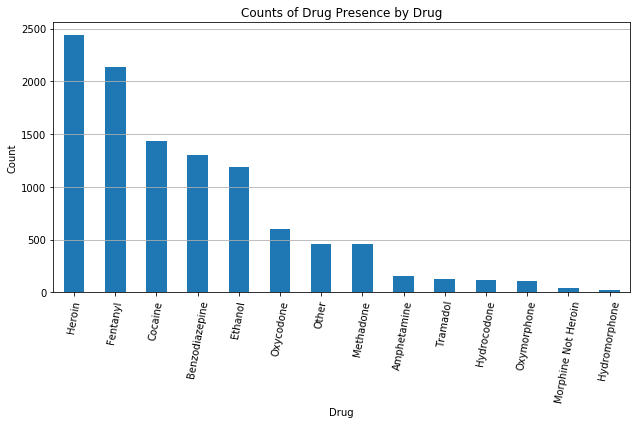

In [17]:
# Count incidences of drugs, and plot
drugs_count = drugs.count()
drugs_count = drugs_count.sort_values(ascending=False)
drug_count_bar = drugs_count.plot(kind='bar',figsize=(9,6))
drug_count_bar.set_title("Counts of Drug Presence by Drug")
drug_count_bar.set_xlabel("Drug")
drug_count_bar.set_ylabel("Count")
drug_count_bar.set_xticklabels(drugs_count.index,rotation=80)
drug_count_bar.grid(axis="y")
# Export Figure
drug_count_bar.figure.tight_layout()
drug_count_bar.figure.savefig('Charts/DrugCountBar.png')
drug_count_bar

In [6]:
# Pie Chart
# Combine drugs with <100 deaths into Other
# Check counts for drug deaths
#drugs.count()
# Morphine not Heroin : 41 and Hydromorphone + 23

In [7]:
pie_drugs = pd.DataFrame(drugs.count())
pie_drugs = pie_drugs.drop(['Morphine Not Heroin','Hydromorphone'])
pie_drugs.loc['Other'] += 64
pie_drugs = pie_drugs.unstack(level=0)
pie_drugs = pie_drugs.sort_values(ascending=False)
pie_drugs

0  Heroin            2437
   Fentanyl          2138
   Cocaine           1433
   Benzodiazepine    1305
   Ethanol           1189
   Oxycodone          597
   Other              521
   Methadone          456
   Amphetamine        156
   Tramadol           127
   Hydrocodone        115
   Oxymorphone        105
dtype: int64

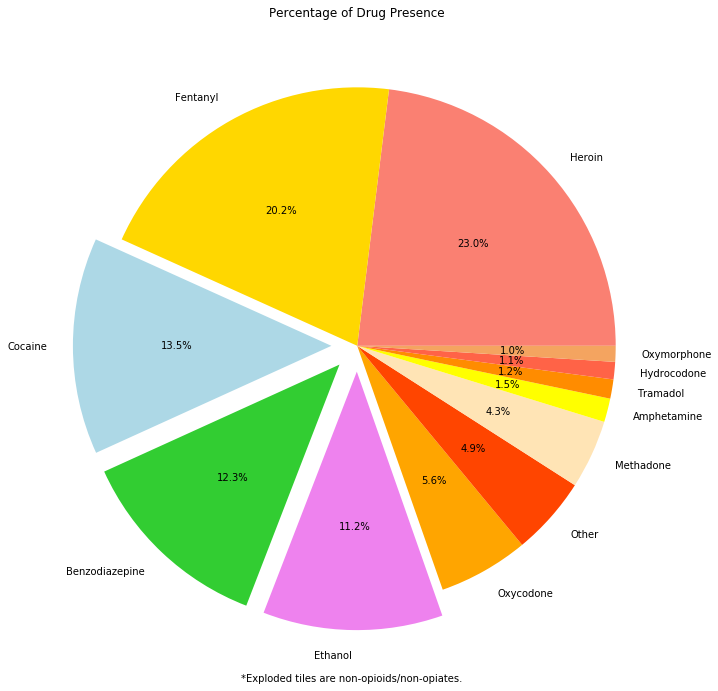

In [8]:
explode = [0,0,0.1,0.1,0.1,0,0,0,0,0,0,0]
cs = ['salmon','gold','lightblue','limegreen','violet','orange','orangered','moccasin','yellow','darkorange','tomato','sandybrown']
drug_count_pie = pie_drugs[0].plot(kind='pie', autopct='%1.1f%%',explode=explode,colors=cs,figsize=(10,10))
drug_count_pie.set_title("Percentage of Drug Presence")
drug_count_pie.set_ylabel('')
drug_count_pie.text(-0.45,-1.3,"*Exploded tiles are non-opioids/non-opiates.")
# Export Figure
drug_count_pie.figure.tight_layout()
drug_count_pie.figure.savefig('Charts/DrugPresencePie.png')
drug_count_pie

In [54]:
# Drug Groupings
drugs['Drugs'] = ''
drugs["# of Drugs"] = ''
for index,row in drugs.iterrows():
    drug_tally = 0
    for col in drugs.columns:
        if row[col] == "Y":
            drugs.loc[index,'Drugs'] += col
            drug_tally += 1
    drugs.loc[index,"# of Drugs"] = drug_tally
    if drug_tally == 0:
        print(drugs.loc[index,:])

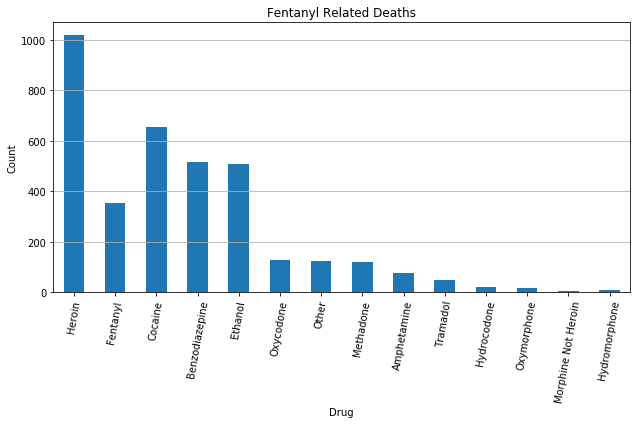

In [55]:
# Fentanyl Contamination?
fentanyl = pd.DataFrame(drugs.loc[drugs['Fentanyl']=='Y',:])
fentanyl = fentanyl[["Heroin", 'Fentanyl', 'Cocaine', 'Benzodiazepine', 'Ethanol', 'Oxycodone', 'Other', 'Methadone',
       'Amphetamine', 'Tramadol', 'Hydrocodone', 'Oxymorphone', 'Morphine Not Heroin', 'Hydromorphone']]
fentanyl = fentanyl.count()
# Change Fentanyl count to ONLY Fentanyl
fentanyl['Fentanyl'] = drugs['Drugs'].value_counts()['Fentanyl']

fent_bar = fentanyl.plot(kind='bar',figsize=(9,6))
fent_bar.set_title('Fentanyl Related Deaths')
fent_bar.set_xlabel("Drug")
fent_bar.set_ylabel("Count")
fent_bar.set_xticklabels(fentanyl.index,rotation=80)
fent_bar.grid(axis="y")
# Export Figure
fent_bar.figure.tight_layout()
fent_bar.figure.savefig('Charts/FentanylRelatedDeathsBar.png')

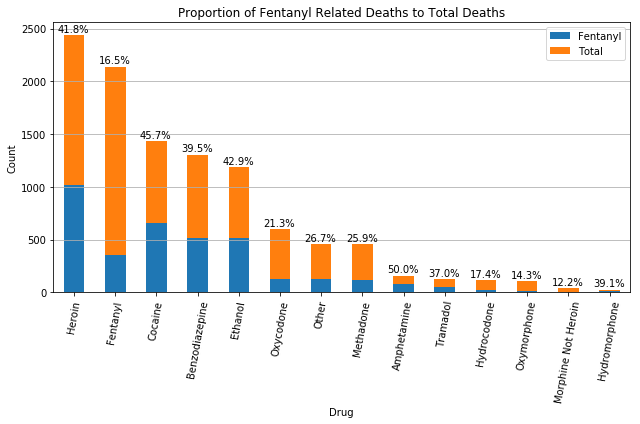

In [77]:
# Fentanyl Comparison Stacked Bar Chart
fent_comp = pd.DataFrame(fentanyl)
fent_comp = fent_comp.rename(columns={0:'Fentanyl'})
fent_comp['Total'] = drugs_count - fent_comp['Fentanyl']
fent_comp['Percent'] = fent_comp['Fentanyl'] / drugs_count * 100

fent_comp_bar = fent_comp[['Fentanyl','Total']].plot(kind='bar',stacked=True,figsize=(9,6))
for i,label in enumerate(list(fent_comp['Percent'])):
    temp = str(round(label,1)) + '%'
    fent_comp_bar.annotate(temp,(i-0.4,drugs_count[i]+30))
fent_comp_bar.set_title('Proportion of Fentanyl Related Deaths to Total Deaths')
fent_comp_bar.set_xlabel("Drug")
fent_comp_bar.set_ylabel("Count")
fent_comp_bar.set_xticklabels(fentanyl.index,rotation=80)
fent_comp_bar.grid(axis="y")
# Export Figure
fent_comp_bar.figure.tight_layout()
fent_comp_bar.figure.savefig('Charts/FentanylStackedBar.png')
fent_comp_bar

In [10]:
num_drugs = drugs["# of Drugs"].value_counts()
num_drugs = num_drugs.sort_index()
num_drugs

1    1434
2    1899
3    1114
4     384
5      75
6      12
7       2
Name: # of Drugs, dtype: int64

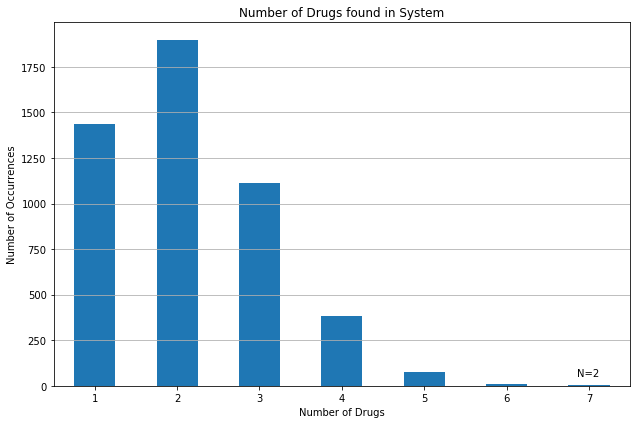

In [11]:
# Number of Drugs Bar
num_bar = num_drugs.plot(kind='bar',figsize=(9,6))
num_bar.set_title("Number of Drugs found in System")
num_bar.set_xlabel("Number of Drugs")
num_bar.set_ylabel("Number of Occurrences")
num_bar.set_xticklabels(num_drugs.index,rotation=0)
num_bar.grid(axis="y")
num_bar.text(num_drugs.index[5]-0.15,50,'N=2')
# Export Figure
num_bar.figure.tight_layout()
num_bar.figure.savefig('Charts/NumDrugsBar.png')
num_bar